# Thiking

1.奇异值分解SVD的原理是怎样的，都有哪些应用场景？

    原理：A=U*奇异值矩阵*V^T，将一个大矩阵拆分为左矩阵、奇异值矩阵、右矩阵，求出矩阵中最重要的特征。奇异值矩阵则为特征值矩阵；
    应用场景：推荐系统、人脸识别
2.funkSVD, BiasSVD，SVD++算法之间的区别是怎样的？

    funkSVD在SVD的基础上添加了LR正则，使得实际评分误差进行目标最优化，BiasSVD加上了用户的商品和偏好，SVD++再BiasSVD的基础上添加了隐式用户反馈。

3.矩阵分解算法在推荐系统中有哪些应用场景，存在哪些不足？

    应用场景：基于标签的推荐、基于内容的推荐；
    不足：1.可解释性差 2.很难融合更多有用的特征。
4.假设一个小说网站，有N部小说，每部小说都有摘要描述。如何针对该网站制定基于内容的推荐系统，即用户看了某部小说后，推荐其他相关的小说。原理和步骤是怎样的？

    取描述摘要里词的高频相似度进行推荐；
    对描述摘要进行分词，用word2vec计算相似度，再用tf-idf计算出词频，再根据最高的词频和相似度进行推荐
    
5.Word2Vec的应用场景有哪些？

    nlp：即时翻译、语音转文字、对话机器人
    推荐：社交、广告、游戏、电商

# Action 1
选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构，当奇异值数量为原有的1%，10%，50%时，输出重构后的图像

In [1]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

In [10]:

# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
	# 对于S，只保留前K个特征值
	s_temp = np.zeros(s.shape[0])
	s_temp[0:k] = s[0:k]
	s = s_temp * np.identity(s.shape[0])
	# 用新的s_temp，以及p,q重构A
	temp = np.dot(p,s)
	temp = np.dot(temp,q)
	plt.imshow(temp, cmap=plt.cm.gray)
	plt.show()
	print(img-temp)


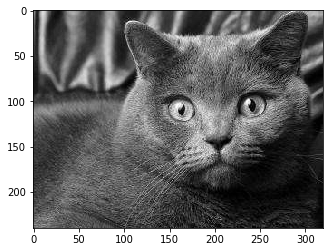

(240, 320)


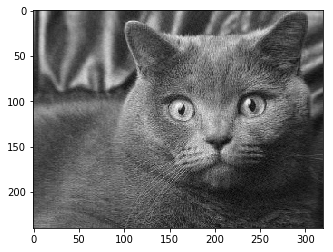

[[  0.71738989   4.69870389   8.73703787 ...   4.40919573   5.67316521
    5.85083564]
 [  1.14649665   3.14953061   4.07252521 ...  -5.10345153  -3.55371311
   -2.92967908]
 [  5.5171351    5.39442198   3.94010162 ...   1.71492644   3.53210148
    4.46003647]
 ...
 [  1.57879486   3.01915385   4.92303115 ...   1.07443372   5.73197778
    9.12283437]
 [ 13.74020078   6.71313417   7.16308749 ...   1.00158675   3.50627071
    5.0939799 ]
 [-15.63276922  -1.72567808   8.53994672 ...  -1.04390029  -5.23261629
  -10.73249741]]


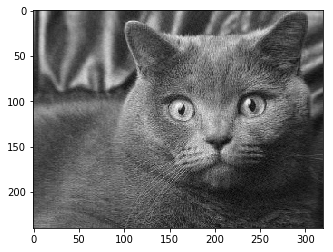

[[  0.71738989   4.69870389   8.73703787 ...   4.40919573   5.67316521
    5.85083564]
 [  1.14649665   3.14953061   4.07252521 ...  -5.10345153  -3.55371311
   -2.92967908]
 [  5.5171351    5.39442198   3.94010162 ...   1.71492644   3.53210148
    4.46003647]
 ...
 [  1.57879486   3.01915385   4.92303115 ...   1.07443372   5.73197778
    9.12283437]
 [ 13.74020078   6.71313417   7.16308749 ...   1.00158675   3.50627071
    5.0939799 ]
 [-15.63276922  -1.72567808   8.53994672 ...  -1.04390029  -5.23261629
  -10.73249741]]


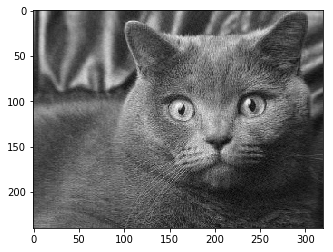

[[  0.71738989   4.69870389   8.73703787 ...   4.40919573   5.67316521
    5.85083564]
 [  1.14649665   3.14953061   4.07252521 ...  -5.10345153  -3.55371311
   -2.92967908]
 [  5.5171351    5.39442198   3.94010162 ...   1.71492644   3.53210148
    4.46003647]
 ...
 [  1.57879486   3.01915385   4.92303115 ...   1.07443372   5.73197778
    9.12283437]
 [ 13.74020078   6.71313417   7.16308749 ...   1.00158675   3.50627071
    5.0939799 ]
 [-15.63276922  -1.72567808   8.53994672 ...  -1.04390029  -5.23261629
  -10.73249741]]


In [12]:

# 加载图片
img =np.array(Image.open('./cat.jpg').convert('L'),'f')
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
plt.show()
print(img.shape)
# #对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(img, full_matrices=False)
# # 取前k个特征，对图像进行还原
imgs=img.shape[0]*img.shape[1]
img_001 = int((imgs*0.5)/(240+1+230)) # 0.01
img_01= int((imgs*0.5)/(240+1+230))   # 0.1
img_05 = int((imgs*0.5)/(240+1+230))  # 0.5

get_image_feature(s, img_001)
get_image_feature(s, img_01)
get_image_feature(s, img_05)


In [ ]:
Action2
使用Google Colab编辑器，对MovieLens数据集进行评分预测，计算RMSE（使用funkSVD, BiasSVD，SVD++）

# Action3
使用Gensim中的Word2Vec对三国演义进行Word Embedding，分析和曹操最相近的词有哪些，曹操+刘备-张飞=?
数据集：three_kingdoms.txt

In [3]:
# -*-coding: utf-8 -*-
# 对txt文件进行中文分词
import jieba
import os
from utils import files_processing

# 源文件所在目录
source_folder = './three_kingdoms/source'
segment_folder = './three_kingdoms/segment'
# 字词分割，对整个文件内容进行字词分割
def segment_lines(file_list,segment_out_dir,stopwords=[]):
    for i,file in enumerate(file_list):
        segment_out_name=os.path.join(segment_out_dir,'three_kingdoms.txt')
        with open(file, 'rb') as f:
            document = f.read()
            document_cut = jieba.cut(document)
            sentence_segment=[]
            for word in document_cut:
                if word not in stopwords:
                    sentence_segment.append(word)
            result = ' '.join(sentence_segment)
            result = result.encode('utf-8')
            with open(segment_out_name, 'wb') as f2:
                f2.write(result)

# 对source中的txt文件进行分词，输出到segment目录中
file_list=files_processing.get_files_list(source_folder, postfix='*.txt')
segment_lines(file_list, segment_folder)


In [4]:
from gensim.models import word2vec
import multiprocessing

# 如果目录中有多个文件，可以使用PathLineSentences
segment_folder = './three_kingdoms/segment'
sentences = word2vec.PathLineSentences(segment_folder)

# 设置模型参数，进行训练
model = word2vec.Word2Vec(sentences, size=100, window=3, min_count=1)
print(model.wv.similarity('曹操', '刘备'))
print(model.wv.similarity('刘备', '张飞'))
print(model.wv.most_similar(positive=['曹操', '刘备'], negative=['张飞']))
# 设置模型参数，进行训练
model2 = word2vec.Word2Vec(sentences, size=128, window=5, min_count=5, workers=multiprocessing.cpu_count())
# 保存模型
model2.save('./models/word2Vec22.model')
print(model2.wv.similarity('曹操', '刘备'))
print(model2.wv.similarity('刘备', '张飞'))
print(model2.wv.most_similar(positive=['曹操', '刘备'], negative=['张飞']))


0.9871246
0.96540964
[('既', 0.9954928755760193), ('汝二人', 0.9953383207321167), ('商议', 0.9946725368499756), ('主公', 0.9945838451385498), ('今', 0.9936240911483765), ('将军', 0.9925006628036499), ('丞相', 0.991762638092041), ('此', 0.9911472201347351), ('臣', 0.9909431338310242), ('等', 0.9902784824371338)]
0.8776661
0.4394632
[('丞相', 0.9835646152496338), ('吾', 0.9770310521125793), ('可任', 0.9763171076774597), ('陛下', 0.9735337495803833), ('何时', 0.973469614982605), ('何人', 0.9734154343605042), ('臣', 0.9733290672302246), ('耳', 0.9699149131774902), ('今', 0.9694958925247192), ('如之何', 0.9691494703292847)]
